# Instrukcja: JupyLab - środowisko do ćwiczeń

- Krzysztof Molenda, 14.11.2025

Wersja przeglądarkowa JupyterLab, zbudowana na bazie JupyterLite: [![lite-badge](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://jupyter.org/try-jupyter/lab/). Nie wymaga instalowania czegokolwiek na lokalnym komputerze. Nie wymaga też rejestracji. Kod uruchamiany jest w przeglądarce, a nie na serwerze (technologia WASM). Wersja ta jest przeznaczona do ćwiczeń i nie wymaga instalacji JupyterLab ani Pythona na lokalnym komputerze.

Wersja dostosowana jest do prowadzania ćwiczeń - wymagane pakiety zostały preinstalowane.

Publikowane dokumenty wykorzystują MyST Markdown, który jest rozszerzeniem Markdown. W przypadku otwarcia dokumentu w innych środowiskach niektóre treści mogą być niepoprawnie wyświetlane, ale nadal powinny być czytelne, zaś kod powinien działać poprawnie.

## Wymagania

- Przeglądarka oparta o silnik Chromium 89+ (Chrome/Edge)

## Wykorzystanie

- Tworzone dokumenty przechowywane są na lokalnym komputerze (w cache'u przeglądarki). Można je pobierać na lokalny komputer (<code>Download</code>).

- Cache przeglądarki jest nietrwałą pamięcią, więc po zamknięciu przeglądarki i wyczyszczeniu cache'u, dokumenty zostaną utracone. Jeśli jednak cache nie zostanie wyczyszczony, dokumenty będą dostępne po ponownym uruchomieniu przeglądarki.

- Można zainstalować JupyterLite jako aplikację PWA (Progressive Web App) na komputerze. W tym celu należy:

  - Kliknąć w ikonę "Zainstaluj aplikację" w prawym górnym rogu paska adresu przeglądarki

  - Aplikacja zostanie zainstalowana na komputerze i będzie dostępna w menu startowym

  - Nadal będzie to przeglądarkowa wersja JupyterLite, ale będzie można ją uruchomić jako aplikację PWA

- Do środowiska można przesłać lokalne pliki (ikona <code>Upload</code>) i otworzyć je w JupyterLite. Pliki można również przesłać do środowiska wskazując na adres URL (menu <code>File -> Open from URL</code>).

- Utworzone pliki w środowisku będą przechowywane w cache'u przeglądarki do momentu jego wyczyszczenia. Z poziomu JupyterLite czyszczenie całego cache'a można wykonać klikając prawym przyciskiem myszy w obszarze plików i wybierając <code>Clear Browser Data</code>.

  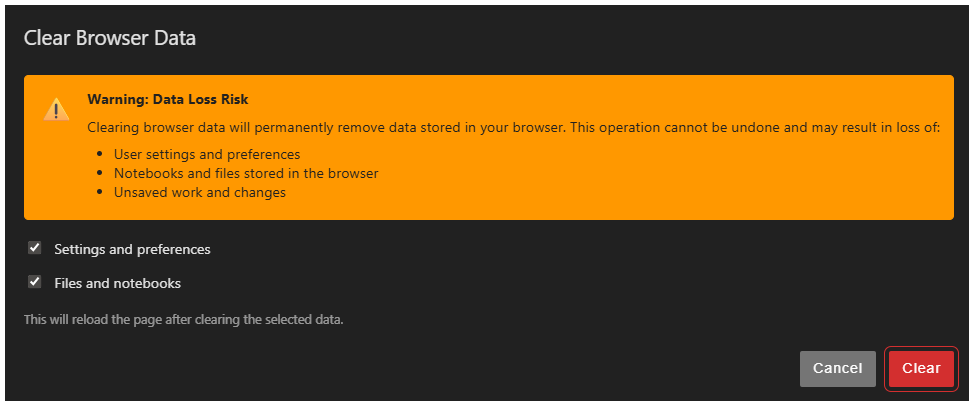

- W środowisku mogą być udostępnione różne pliki wymagane do realizacji ćwiczeń. Pliki te można modyfikować. Uruchomienie kodu będzie dotyczyło ich zmodyfikowanych wersji. Usunięcie takiego "predefiniowanego" pliku spowoduje, że jego zawartość zostanie przywrócona do stanu pierwotnego.

## Technikalia

Ta wersja JupyterLite wykorzystuje kernel XEUS: `xeus-python (XPython)` oraz `xeus-sqlite (XSQLite)`.

![](https://raw.githubusercontent.com/jupyter-xeus/xeus/refs/heads/main/docs/source/xeus.svg)

### Wersja Pyhona

Sprawdzenie wersji Pythona można wykonać poleceniem:

In [ ]:
import sys
print(sys.version)

### Preinstalowane pakiety

W ramach środowiska zainstalowane są najczęściej używane do zajęć pakiety.

Sprawdzenie dostępnych pakietów można wykonać poleceniem:

- `%mamba list` lub `conda list` - dla pakietów zainstalowanych przy użyciu menedżera `mamba/conda` z kanału `conda-forge`
- `%pip list` - dla pakietów zainstalowanych przy pomocy menedżera `pip` z kanału PyPI (_Python Package Index_)

Dla tego środowiska domyślnym menedżerem jest `mamba/conda` i domyślnym kanałem jest `conda-forge`

W bardziej uniwersalny sposób można uruchomić kod Pythona wypisujący zainstalowane i zarejestrowane pakiety:

In [ ]:
from importlib.metadata import distributions

for dist in distributions():
    print(f"{dist.metadata['Name']}=={dist.version}")

### Instalacja nowych pakietów

Zainstalowanie dodatkowych pakietów jest możliwe w tej wersji JupyterLab (kernel Xeus) za pomocą menedżera `mamba` lub `conda` - z uzyciem magicznych instrukcji JupyterLite (poprzedzonych `%`):

```
%mamba install <nazwa_pakietu>
```

Oprogramowanie pobierane będzie z oficjalnego kanału `conda-forge`, o ile występuje ich skompilowana wersja wasm WASM (_WebAssembly_). Użytkownicy raportują pewne problemy z ustalaniem zależności przez `mamba/conda` - w takiej sytuacji przed instalacją własciwego pakietu należy ręcznie wcześniej zainstalować zależne od niego inne pakiety.

Niektóre pakiety nie są dostepne w `conda-forge` - można posłużyć się repozytorium PyPI i menedżerem `pip`:

```
%pip install <nazwa_pakietu>
```

lub jawnie kodem Pythona w komórce:

```python
import micropip
await micropip.install('nazwa_pakietu')
```

### Debugowanie kodu i podgląd zmiennych

JupyterLite działa w przeglądarce i jest uproszczoną, lżejszą wersją pełnego JupyterLab. Stąd, ma wiele ograniczeń (m.in w zakresie interaktywnego debugowania kodu).

W kodzie można stosować klasyczne metody debugowania, takie jak wstawianie instrukcji `print()` w kluczowych miejscach, aby śledzić wartości zmiennych i przepływ wykonywania.

Można również korzystać z modułu `pdb` (`Python Debugger`). W JupyterLite można próbować umieścić w kodzie `import pdb; pdb.set_trace()`, choć ze względu na środowisko częściowa funkcjonalność może być ograniczona. Aby zacząć go używać, należy:

1. Zaimportować moduł pdb i wstawić w miejsce, w którym chcemy zatrzymać wykonanie kodu, komendę:

    ```python
    import pdb; pdb.set_trace()
    ```

    Spowoduje to zatrzymanie programu i wejście w interaktywny tryb debuggera.

2. W trybie debuggera możemy wykonać następujące podstawowe komendy:
    
    - `n` (next) — przejście do następnej linii kodu,
    - `s` (step) — wejście do funkcji wywoływanej w bieżącej linii,
    - `c` (continue) — kontynuacja wykonywania programu do następnego breakpointu lub końca,
    - `l` (list) — wyświetlenie kilku linijek kodu źródłowego wokół aktualnej linii,
    - `p <zmienna>` — wypisanie wartości zmiennej,
    - `q` (quit) — wyjście z trybu debuggera i zakończenie programu.

3. Można także ustawiać breakpoints przed uruchomieniem debugera, np. w kodzie:

    ```python
    pdb.set_trace()
    ```

    zatrzyma działanie i pozwoli na interaktywną inspekcję stanu programu.

4. W trybie debugowania można poruszać się po stosie wywołań (komendy `u` – up, `d` – down), sprawdzać aktualne zmienne oraz lokalizacje.

5. Aby zakończyć sesję debuggera i kontynuować, wpisuje się `c` lub aby wyjść całkowicie `q`.


```{important} WAŻNE
Do wypisania aktywnych zmiennych w notatniku służą magiczne komendy JupyterLite umieszczone w komórce kodu:

- `%who` - wypisuje listę zmiennych
- `%whos` - wypisuje zmienne i aktualne ich wartości
```


In [ ]:
x = 1
y = 2
import pdb; pdb.set_trace()
z = x + y

In [ ]:
%who

In [ ]:
%whos

%MyST

:::{warning}
Środowisko to jest wersją eksperymentalną. Nie ma gwarancji poprawnego funkcjonowania, w szczególności trwałego przechowywania plików oraz nieoczekiwanych zmian w konfiguracji.

Po zakończeniu pracy pobierz swój notatnik na lokalny komputer!
:::